>>[Scenario](#scrollTo=I2AkTlSg35v_)

>>[Setup](#scrollTo=I2AkTlSg35v_)

>>[Step 1: Load the data](#scrollTo=BgWCG2ex35wB)

>>[Step 2: Review the data](#scrollTo=0AFV-F3435wC)

>>[Step 3: Convince the museum board](#scrollTo=3aKcK4jH35wD)

>>[Step 4: Assess seasonality](#scrollTo=QQBayGzH35wD)

>>>>[Part A](#scrollTo=QQBayGzH35wD)

>>>>[Part B](#scrollTo=csjsGIMQ35wD)



In this exercise, you will use your new knowledge to propose a solution to a real-world scenario. To succeed, you will need to import data into Python, answer questions using the data, and generate **line charts** to understand patterns in the data.

## Scenario

You have recently been hired to manage the museums in the City of Los Angeles. Your first project focuses on the four museums pictured in the images below.

![ex1_museums](https://storage.googleapis.com/kaggle-media/learn/images/pFYL8J1.png)

You will leverage data from the Los Angeles [Data Portal](https://data.lacity.org/) that tracks monthly visitors to each museum.  

![ex1_xlsx](https://storage.googleapis.com/kaggle-media/learn/images/mGWYlym.png)

## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Setup Complete


The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

## Step 1: Load the data

Your first assignment is to read the LA Museum Visitors data file into `museum_data`.  Note that:
- The filepath to the dataset is stored as `museum_filepath`.  Please **do not** change the provided value of the filepath.
- The name of the column to use as row labels is `"Date"`.  (This can be seen in cell A1 when the file is opened in Excel.)

To help with this, you may find it useful to revisit some relevant code from the tutorial, which we have pasted below:

```python
# Path of the file to read
spotify_filepath = "../input/spotify.csv"

# Read the file into a variable spotify_data
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)
```

The code you need to write now looks very similar!

In [3]:
# Path of the file to read
museum_filepath = "museum_visitors.csv"

# Fill in the line below to read the file into a variable museum_data and make date the defualt index
# hint use read_csv index_col varaible
museum_data = pd.read_csv(museum_filepath)

## Step 2.1: Review the data

Use a Python command to print the last 5 rows of the data.

In [4]:
# Print the last five rows of the data
museum_data.tail()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
54,2018-07-01,23136,4191,2620,4718
55,2018-08-01,20815,4866,2409,3891
56,2018-09-01,21020,4956,2146,3180
57,2018-10-01,19280,4622,2364,3775
58,2018-11-01,17163,4082,2385,4562


The last row (for `2018-11-01`) tracks the number of visitors to each museum in November 2018, the next-to-last row (for `2018-10-01`) tracks the number of visitors to each museum in October 2018, _and so on_.

Use the last 5 rows of the data to answer the questions below.

In [9]:
# Fill in the line below: How many visitors did the Chinese American Museum
museum_data_tail = museum_data.tail()

# receive in July 2018?
ca_museum_jul18 = museum_data_tail.iloc[0]['Chinese American Museum']
print("Chinese American Museum Vistors in July 2018 are: ", ca_museum_jul18)

# Fill in the line below: In October 2018, how many more visitors did Avila
# Adobe receive than the Firehouse Museum?
avila_oct18 = museum_data_tail.iloc[-1]['Avila Adobe']
print("Avila Adobe Museum Vistors in October 2018 are: ", avila_oct18)

Chinese American Museum Vistors in July 2018 are:  2620
Avila Adobe Museum Vistors in October 2018 are:  17163


### Step 2.2: Assessment of teh data

In [11]:
museum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Date                                  59 non-null     object
 1   Avila Adobe                           59 non-null     int64 
 2   Firehouse Museum                      59 non-null     int64 
 3   Chinese American Museum               59 non-null     int64 
 4   America Tropical Interpretive Center  59 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.4+ KB


> Convert the date column into pandas.datetime format.

In [14]:
museum_data['Date'] = pd.to_datetime(museum_data['Date'])
museum_data.dtypes

Date                                    datetime64[ns]
Avila Adobe                                      int64
Firehouse Museum                                 int64
Chinese American Museum                          int64
America Tropical Interpretive Center             int64
dtype: object

In [54]:
museum_data.isna().sum()

Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
Year                                    0
dtype: int64

> There are no Na values.

In [56]:
museum_data.describe()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center,Year
count,59,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2016-05-31 20:20:20.338983168,24061.661017,6472.830508,2721.254237,7107.016949,2015.966102
min,2014-01-01 00:00:00,14035.000000,3306.000000,1073.000000,2824.000000,2014.000000
25%,2015-03-16 12:00:00,19469.500000,4412.500000,2134.000000,5424.500000,2015.000000
50%,2016-06-01 00:00:00,23136.000000,5181.000000,2419.000000,6602.000000,2016.000000
75%,2017-08-16 12:00:00,27502.000000,6239.500000,2942.500000,7943.000000,2017.000000
max,2018-11-01 00:00:00,41242.000000,61192.000000,7702.000000,13490.000000,2018.000000
std,NaN,5948.997414,7471.196609,1165.585196,2561.671286,1.413800


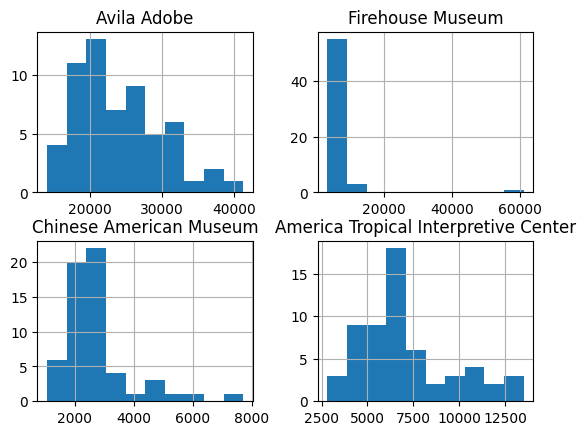

In [61]:
museum_data.iloc[:, 1:-1].hist();

> Both of The firehouse and the Chinese American museums have a right skewed distribution

## Step 3: Convince the museum board

The Firehouse Museum claims they ran an event in 2014 that brought an incredible number of visitors, and that they should get extra budget to run a similar event again.  The other museums think these types of events aren't that important, and budgets should be split purely based on recent visitors on an average day.  

To show the museum board how the event compared to regular traffic at each museum, create a line chart that shows how the number of visitors to each museum evolved over time.  Your figure should have four lines (one for each museum).

In [51]:
museum_data['Year'] = museum_data['Date'].dt.year ## Extracting teh year column to use it in the group by
grouped_by_year = museum_data.groupby(by='Year')[['Avila Adobe',	'Firehouse Museum',	'Chinese American Museum',	'America Tropical Interpretive Center']].sum() 

> Which is better here to aggregate by sum or by average?

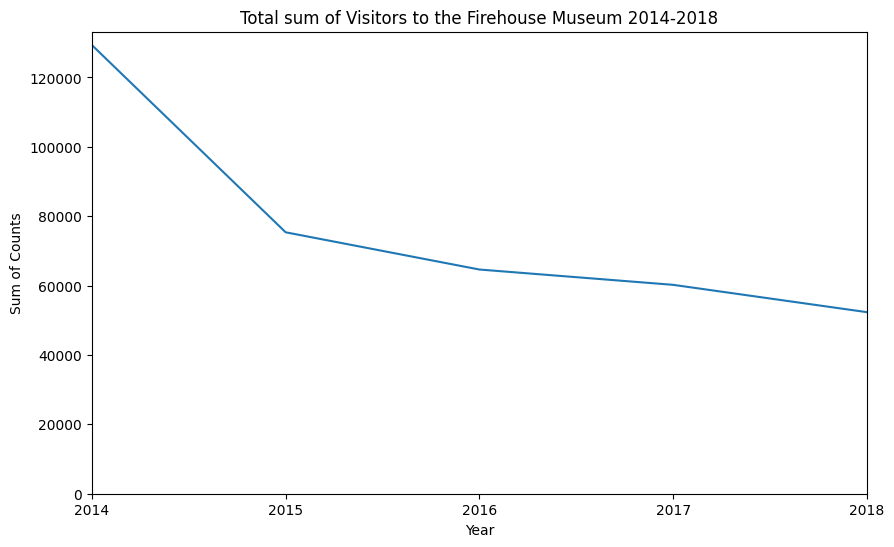

In [81]:
# Line chart showing the number of visitors to Firehouse Museum
plt.figure(figsize=(10,6))

sns.lineplot(grouped_by_year['Firehouse Museum'])

plt.xlim(2014, 2018)
plt.ylim(0)
plt.xticks(range(2014, 2019))

plt.xlabel('Year')
plt.ylabel('Sum of Counts')
plt.title('Total sum of Visitors to the Firehouse Museum 2014-2018');

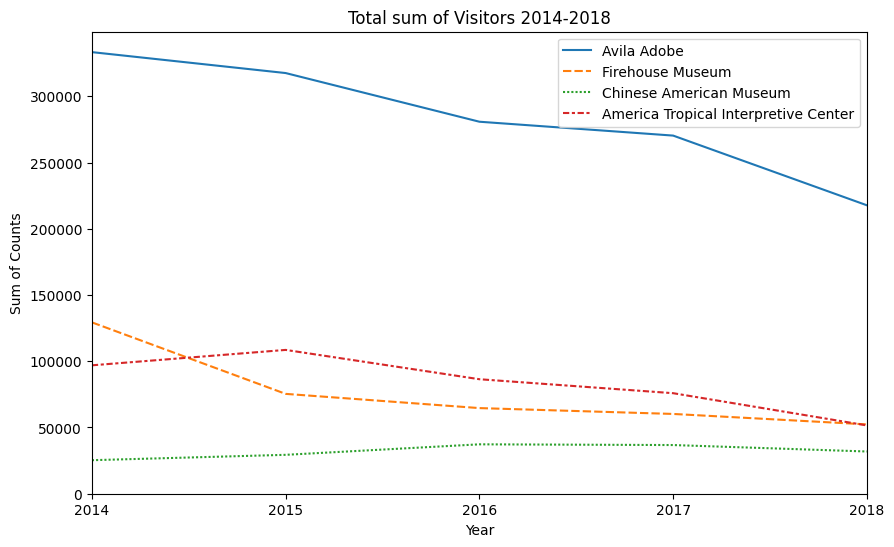

In [80]:
# Line chart showing the number of visitors to each museum over time
plt.figure(figsize=(10,6))

sns.lineplot(grouped_by_year)

plt.xlabel('Year')
plt.ylabel('Sum of Counts')

plt.xlim(2014, 2018)
plt.ylim(0)
plt.xticks(range(2014, 2019))

plt.title('Total sum of Visitors 2014-2018');

> It seems that in 2014, The Firehouse Museum has the highest sum of visitors in comparison to the chinese american and the american tropical interpretive center. That could be due to the evnet that they held that hear.  

## Step 4: Assess seasonality

When meeting with the employees at Avila Adobe, you hear that one major pain point is that the number of museum visitors varies greatly with the seasons, with low seasons (when the employees are perfectly staffed and happy) and also high seasons (when the employees are understaffed and stressed).  You realize that if you can predict these high and low seasons, you can plan ahead to hire some additional seasonal employees to help out with the extra work.

#### Part A
Create a line chart that shows how the number of visitors to Avila Adobe has evolved over time.  (_If your code returns an error, the first thing that you should check is that you've spelled the name of the column correctly!  You must write the name of the column exactly as it appears in the dataset._)

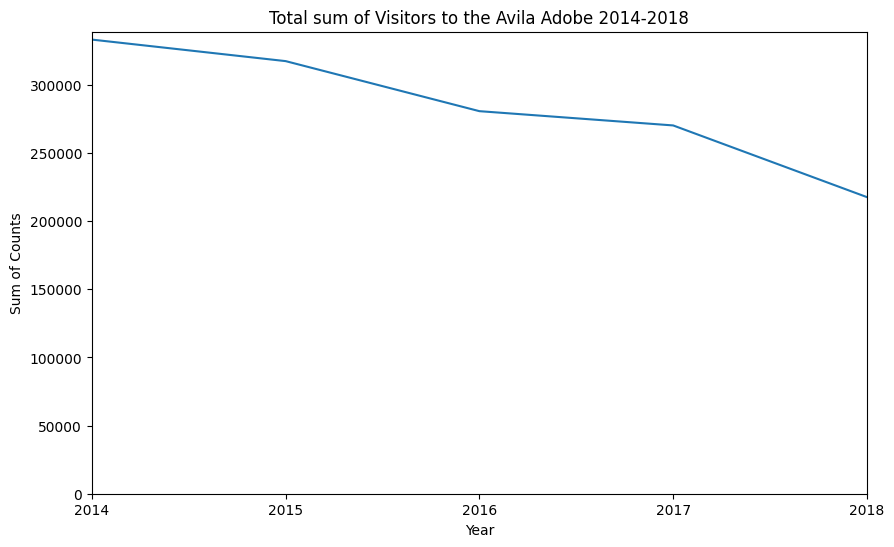

In [109]:
# Line chart showing the number of visitors to Firehouse Museum
plt.figure(figsize=(10,6))

sns.lineplot(grouped_by_year['Avila Adobe'])

plt.xlim(2014, 2018)
plt.ylim(0)
plt.xticks(range(2014, 2019))

plt.xlabel('Year')
plt.ylabel('Sum of Counts')
plt.title('Total sum of Visitors to the Avila Adobe 2014-2018');

> Number of visitors is following a negative trend and going down while the years are coming up. Still the numbers of visitors are are very high.

#### Part B

Does Avila Adobe get more visitors:
- in September-February (in LA, the fall and winter months), or
- in March-August (in LA, the spring and summer)?  

Using this information, when should the museum staff additional seasonal employees?

In [84]:
museum_data['Month'] = museum_data['Date'].dt.month
museum_data.sample(5)

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center,Year,Month
45,2017-10-01,22164,4822,2419,6097,2017,10
46,2017-11-01,17629,4613,2685,6757,2017,11
39,2017-04-01,25234,5320,3273,6685,2017,4
52,2018-05-01,25173,8013,4960,5626,2018,5
8,2014-09-01,28473,61192,1073,5661,2014,9


In [88]:
grouped_by_month = museum_data.groupby('Month')[['Avila Adobe', 'Firehouse Museum', 'Chinese American Museum',
       'America Tropical Interpretive Center']].sum()

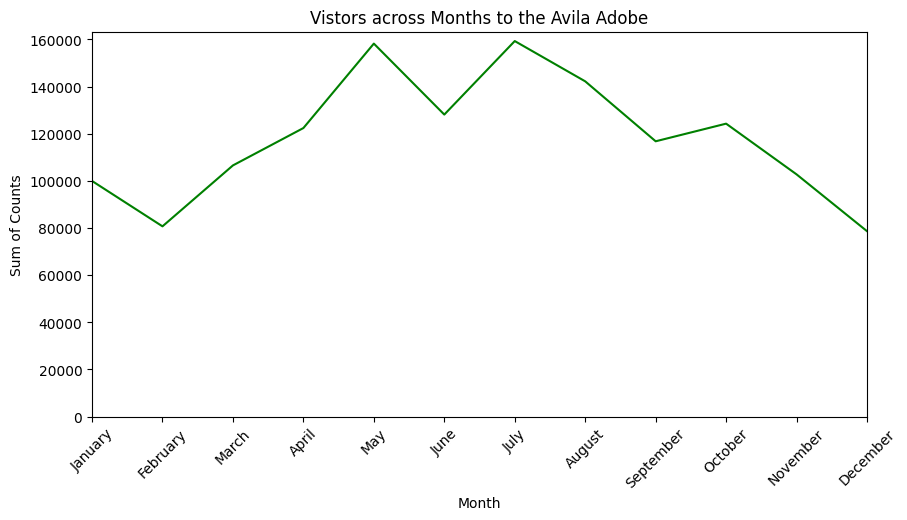

In [108]:
# Line plot showing the number of visitors to Avila Adobe over time
plt.figure(figsize=(10,5))

sns.lineplot(grouped_by_month['Avila Adobe'], color='green')

plt.xticks(rotation=45, ticks=range(1, 13), 
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlim(1,12)
plt.ylim(0)

plt.title('Vistors across Months to the Avila Adobe')
plt.ylabel('Sum of Counts')
plt.xlabel('Month');